1.) do pd.get_dummies on games dataframe
2.) concat relevant variables from games to games_nlp and see if that is feasable
3.) do relevant data cleaning in order to see if that can be feasible
do random forest regression, do svm regression, ridge, lasso, 
4.) start new jupyter notebook that is CLEAN
5.) finish technical report concurrently with the new notebook
6.) prepare presentation slides concurrently
7.) Do a brief history of gaming section

In [1]:
import requests
import bs4
from bs4 import BeautifulSoup
import urllib
from urllib.request import urlopen 
import pandas as pd
import matplotlib.pyplot as plt
import re
import scipy.stats
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import nltk

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor


/Users/richardmason/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [5]:
games = pd.read_csv('./games.csv')

In [6]:
games.head()

,release_date,title,platform,critic_score,user_score,developer,genres,rating,critic_review_text,user_review_text,num_critic_reviews,num_user_reviews
0,1998-11-23,The Legend of Zelda: Ocarina of Time,N64,99,91,Nintendo,"['Action Adventure', 'Fantasy']",E,"[""[Review Score = 110] What's significant abo...","['As a young boy, Link is tricked by Ganondorf...",22,4204
1,2000-09-20,Tony Hawk's Pro Skater 2,PS,98,74,Neversoft Entertainment,"['Sports', 'Alternative', 'Skateboarding']",T,"[""Grind until your wheels fall off, because th...","[""Tony Hawk's Pro Skater 2 is a game I've been...",19,435
2,2000-09-20,Tony Hawk's Pro Skater 2,PS,98,74,Treyarch,"['Sports', 'Alternative', 'Skateboarding']",T,"[""More game play, more parks, more sounds and ...","[""Hawk's back - with new technology, new pros ...",18,68
3,2000-09-20,Tony Hawk's Pro Skater 2,PS,98,74,Vicarious Visions,"['Sports', 'Alternative', 'Skateboarding']",E,['It brings everything from the Playstation HA...,"['Hawks back, in the worlds first 3D handheld ...",16,28
4,2000-09-20,Tony Hawk's Pro Skater 2,PS,98,74,Neversoft Entertainment,"['Sports', 'Alternative', 'Individual', 'Skate...",T,"['With a ton of tricks, parks, and game modes,...","[""Players can choose to skate with the skills ...",22,156


In [7]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27379 entries, 0 to 27378
Data columns (total 12 columns):
release_date          27379 non-null object
title                 27379 non-null object
platform              27379 non-null object
critic_score          27379 non-null int64
user_score            27379 non-null int64
developer             27379 non-null object
genres                27379 non-null object
rating                27379 non-null object
critic_review_text    27379 non-null object
user_review_text      27379 non-null object
num_critic_reviews    27379 non-null int64
num_user_reviews      27379 non-null int64
dtypes: int64(4), object(8)
memory usage: 2.5+ MB


EDA

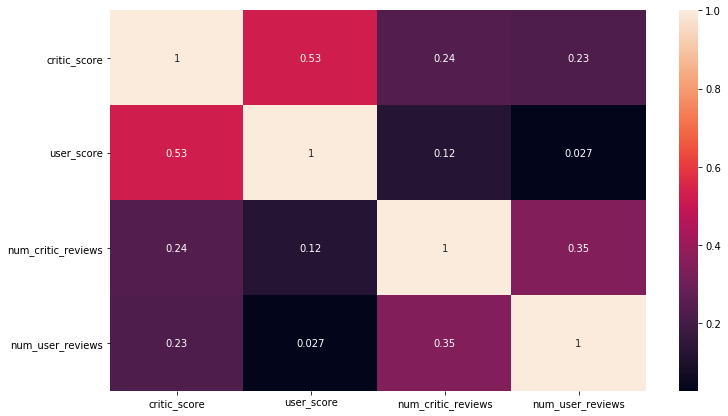

In [8]:
plt.figure(figsize=(12, 7))
sns.heatmap(games.corr(), annot=True)
plt.savefig('./heatmap.png')

In [9]:
games['release_date'] = pd.to_datetime(games['release_date'])

games.set_index('release_date', inplace=True)

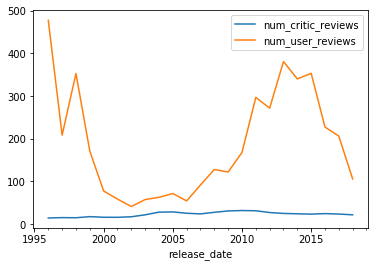

In [10]:
games.resample('Y').mean()[['num_critic_reviews', 'num_user_reviews']].plot()
plt.savefig('./num_reviews_time.png')

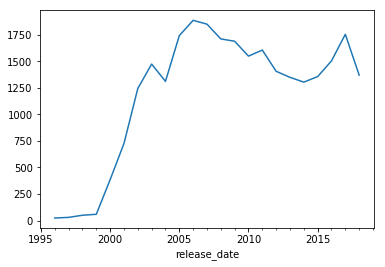

In [11]:
games['title'].resample('Y').count().plot()
plt.savefig('./num_titles_time.png')

Text(0.5, 15.0, 'release date')

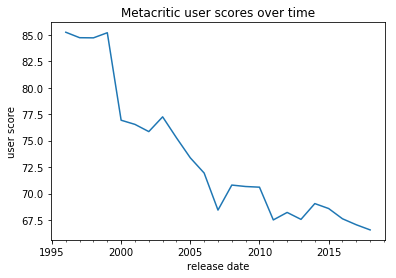

In [12]:
games['user_score'].resample('Y').mean().plot()
plt.savefig('./user_score_time.png')
plt.title('Metacritic user scores over time')
plt.ylabel('user score')
plt.xlabel('release date')

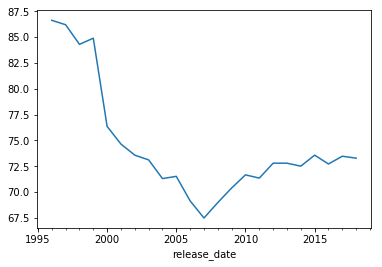

In [13]:
games['critic_score'].resample('Y').mean().plot()
plt.savefig('./critic_score_time.png')

In [14]:
games['developer'].value_counts().mean()

9.841480948957585

In [15]:
games['developer'].value_counts().median()

2.0

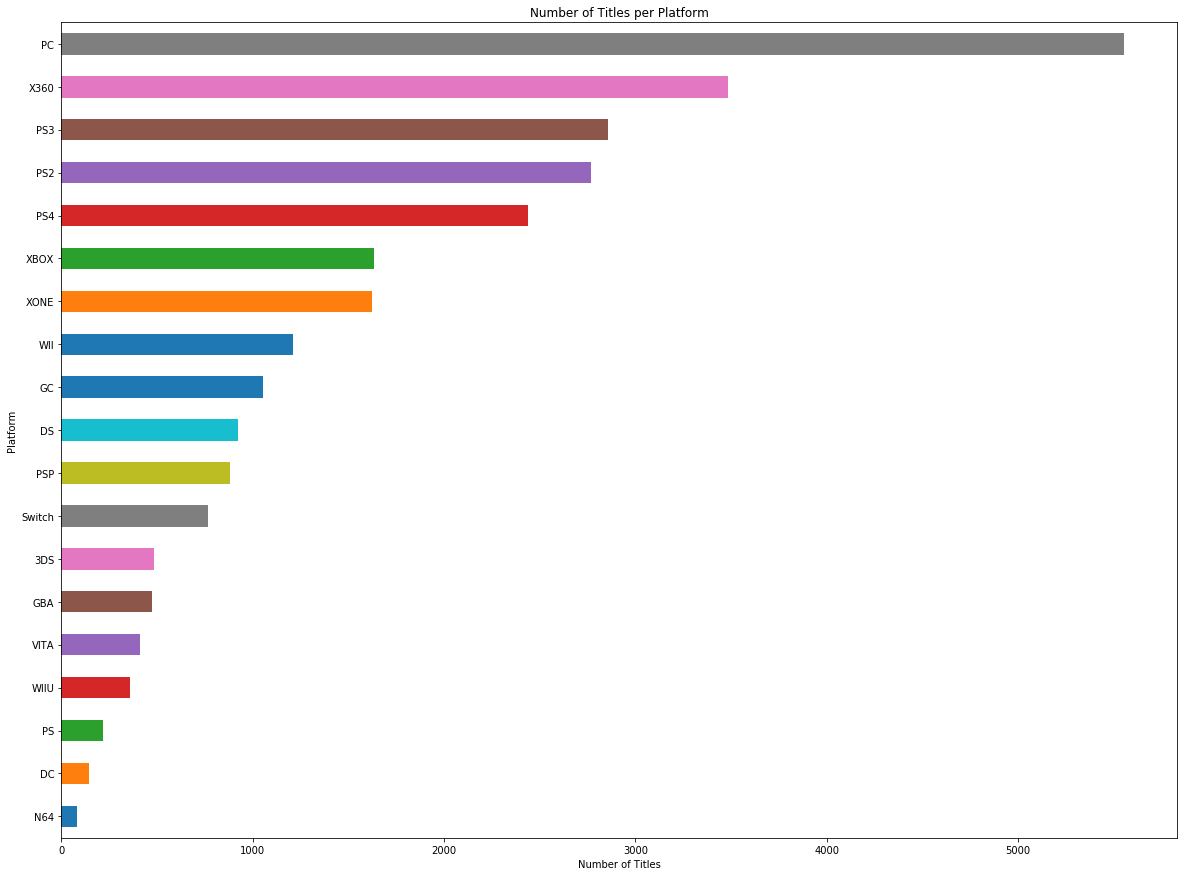

In [16]:
plt.figure(figsize=(20,15))
games['platform'].value_counts(ascending = True).plot.barh()
plt.title('Number of Titles per Platform')
plt.ylabel('Platform')
plt.xlabel('Number of Titles');
plt.savefig('./titles_per_platform.png')

In [17]:
platform_mean = games.groupby('platform').mean()

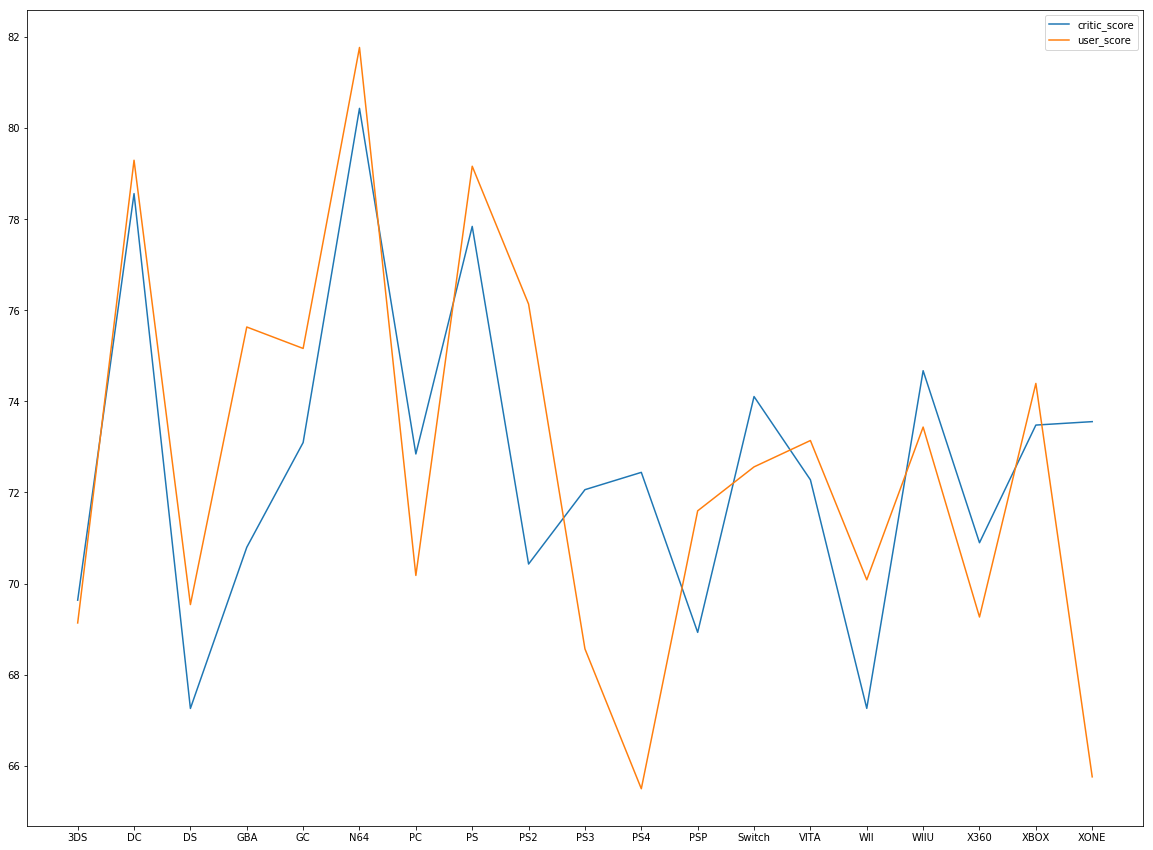

In [18]:
plt.figure(figsize=(20,15))
plt.plot(platform_mean['critic_score'], label='critic_score')
plt.plot(platform_mean['user_score'], label='user_score')
plt.legend();
plt.savefig('./score_per_platform.png')

Separating the dataframe into nlp and standard components

In [19]:
games_nlp = games[['critic_score', 'user_score', 'critic_review_text', 'user_review_text']]

In [20]:
games.drop(columns = ['critic_review_text', 'user_review_text'], inplace = True)

In [21]:
games_regression = pd.get_dummies(games.drop(columns = 'title'))

splitting the data into train test

In [22]:
y_critic = games_regression['critic_score']
y_user = games_regression['user_score']
X_critic = games_regression.drop(columns = 'critic_score')
X_user = games_regression.drop(columns = 'user_score')

In [23]:
X.head()

NameError: name 'X' is not defined

In [ ]:
X_critic.corrwith(y_critic).sort_values(ascending = False)

In [ ]:
X_user.corrwith(y_user).sort_values(ascending=False)

ACTUAL MODELING SECTION (NLP followed by appending other variables onto the Xs.to_dense() dataframe!!!)

In [ ]:

y_nlp = games_nlp['critic_score']
X_nlp = games_nlp['critic_review_text']

vec = CountVectorizer(stop_words='english', min_df=10)

vec.fit(X_nlp)
Xs = vec.transform(X_nlp)

nlp_critic = pd.DataFrame(Xs.todense(), columns=vec.get_feature_names())

lasso = Lasso(alpha = 0.1)

lasso.fit(Xs, y_nlp.values)

coefs_df = pd.DataFrame({'coefs': vec.get_feature_names(), 'values': lasso.coef_})
coefs_df.head()

coefs_df.sort_values('values', ascending = False)

In [ ]:
y_nlp = games_nlp['user_score']
X_nlp = games_nlp['user_review_text']

vec = CountVectorizer(stop_words='english', min_df=10)

vec.fit(X_nlp)
Xs = vec.transform(X_nlp)

nlp_critic = pd.DataFrame(Xs.todense(), columns=vec.get_feature_names())

lasso = Lasso(alpha = 0.1)

lasso.fit(Xs, y_nlp.values)

coefs_df = pd.DataFrame({'coefs': vec.get_feature_names(), 'values': lasso.coef_})
coefs_df.head()

coefs_df.sort_values('values', ascending = False)